In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import scipy.stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as pp
import pandas.plotting
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [12]:
df = pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

In [13]:
attack_type_analysis = df.groupby("attacktype1_txt").success.value_counts(normalize=True)
attack_type_analysis.unstack()

success,0,1
attacktype1_txt,,
Armed Assault,0.054466,0.945534
Assassination,0.243217,0.756783
Bombing/Explosion,0.121523,0.878477
Facility/Infrastructure Attack,0.055716,0.944284
Hijacking,0.121396,0.878604
Hostage Taking (Barricade Incident),0.008073,0.991927
Hostage Taking (Kidnapping),0.022495,0.977505
Unarmed Assault,0.133990,0.866010
Unknown,0.173310,0.826690


Text(0.5, 1.0, 'Normalized success rate of attack based on particular terrorist event')

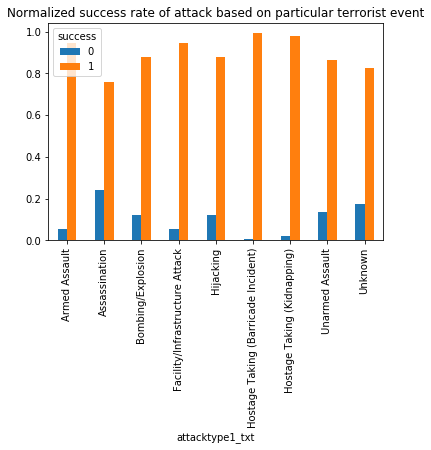

In [20]:
#checking relation between type of terror attack and success rate.
attack_type_analysis.unstack().plot(kind = "bar");pp.title("Normalized success rate of attack based on particular terrorist event")

In [34]:
#chi-square test between the attack type and success rate giving the quantitative measure for correlation with p_value and chi-statistic 
attack_type_analysis2 = df.groupby("attacktype1_txt").success.value_counts()
stat, p, dof, expected = chi2_contingency(attack_type_analysis2.unstack())
prob = 0.95
critical = chi2.ppf(prob, dof)
print('dof=%d' % dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent,so we have to reject H0')
else:
	print('Independent, so we cant reject reject H0')

dof=8
probability=0.950, critical=15.507, stat=6537.701
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


In [41]:
location_analysis = df.groupby("country_txt").success.value_counts()
location_analysis.unstack()
type(location_analysis)

pandas.core.series.Series

Text(0.5, 1.0, 'Top countries prone success in attacks')

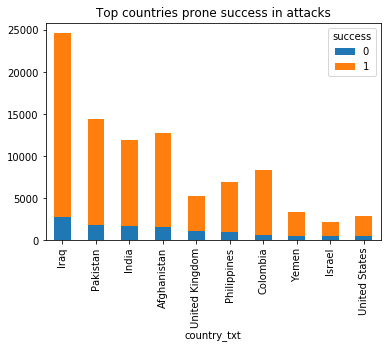

In [54]:
#areas prone to attacks that are also successful
temp = location_analysis.unstack()
top_countries = temp.sort_values(0,ascending = False).head(10)
top_countries.plot(kind="bar", stacked = True);pp.title("Top countries prone success in attacks")

In [ ]:
stat, p, dof, expected = chi2_contingency(top_countries)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('dof=%d' % dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent,so we have to reject H0')
else:
	print('Independent, so we cant reject reject H0')